In [0]:
#This is required to attach the Colab Notebook to a google drive 
#where the dataset is stored
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
import random
import sys
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

!pip install -q brewer2mpl
import brewer2mpl

Using TensorFlow backend.


In [0]:
#Function to reclassify unused labels in the dataset
#to Happy, Sad or Neutral
def emotion_count(y_train, classes):
    """
    The function re-classify picture with disgust label into angry label
    """
    emo_classcount = {}
    print ('Angry classified as Happy')
    print ('Disgust classified as Sad')
    print ('Fear classified as Sad')
    print ('Surprise classified as Happy')
    print (' ')
    y_train.loc[y_train == 0] = 3
    y_train.loc[y_train == 1] = 4
    y_train.loc[y_train == 2] = 4
    y_train.loc[y_train == 5] = 3
    classes.remove('Angry')
    classes.remove('Disgust')
    classes.remove('Fear')
    classes.remove('Surprise')
    for new_num, _class in enumerate(classes):
        y_train.loc[(y_train == emotion[_class])] = new_num
        class_count = sum(y_train == (new_num))
        emo_classcount[_class] = (new_num, class_count)
    return y_train.values, emo_classcount

In [0]:
#Function to take csv file with dataset and repurpose into images and labels
#Also calls above function to remove labels
def load_data(sample_split, usage, classes, 
              filepath='drive/My Drive/Colab Notebooks/EmotionNet/EmotionDataset/icml_face_data.csv'):
    """
    The function load provided CSV dataset and further reshape, rescale the data for feeding
    """
    df = pd.read_csv(filepath)
    df = df[df.Usage == usage]
    frames = []
    classes.append('Angry')
    classes.append('Disgust')
    classes.append('Fear')
    classes.append('Surprise')
    for _class in classes:
        class_df = df[df['emotion'] == emotion[_class]]
        frames.append(class_df)
    data = pd.concat(frames, axis=0)
    rows = random.sample(list(data.index), int(len(data)*sample_split))
    data = data.loc[rows]
    x = list(data["pixels"])
    X = []
    for i in range(len(x)):
        each_pixel = [int(num) for num in x[i].split()]
        X.append(each_pixel)
    ## reshape into 48*48*1 and rescale
    X = np.array(X)
    X = X.reshape(X.shape[0], 48, 48,1)
    X = X.astype("float32")
    X /= 255
    
    y_train, new_dict = emotion_count(data.emotion, classes)
    y_train = to_categorical(y_train)
    return X, y_train

In [0]:
#Provide all labels and the three we are keeping
#Call load_data function 3 times - seperate training, testing, validation data
# All three datasets are loaded accordingly

emotion = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}

emo     = ['Happy','Sad','Neutral']

X_test, y_test = load_data(sample_split=1.0, usage ='PrivateTest', classes=emo)

X_train, y_train = load_data(sample_split=1.0, usage ='Training', classes=emo)

X_val,y_val = load_data(sample_split=1.0, usage ='PublicTest', classes=emo)


Angry classified as Happy
Disgust classified as Sad
Fear classified as Sad
Surprise classified as Happy
 
Angry classified as Happy
Disgust classified as Sad
Fear classified as Sad
Surprise classified as Happy
 
Angry classified as Happy
Disgust classified as Sad
Fear classified as Sad
Surprise classified as Happy
 


In [0]:
# The shape of loaded data is under examination
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(28709, 48, 48, 1)
(28709, 3)
(3589, 48, 48, 1)
(3589, 3)
(3589, 48, 48, 1)
(3589, 3)


In [0]:
#save datasets which can be used offline to test accuracy
def save_data(X_test, y_test, fname=''):
    """
    The function stores loaded data into numpy form for further processing
    """
    np.save( 'X_test' + fname, X_test)
    np.save( 'y_test' + fname, y_test)
save_data(X_test, y_test,"_privatetest6_100pct")
X_fname = 'X_test_privatetest6_100pct.npy'
y_fname = 'y_test_privatetest6_100pct.npy'
X = np.load(X_fname)
y = np.load(y_fname)
print ('Private test set')
y_labels = [np.argmax(lst) for lst in y]
counts = np.bincount(y_labels)
labels = ['happy', 'sad','neutral']
print (zip(labels, counts))

Private test set


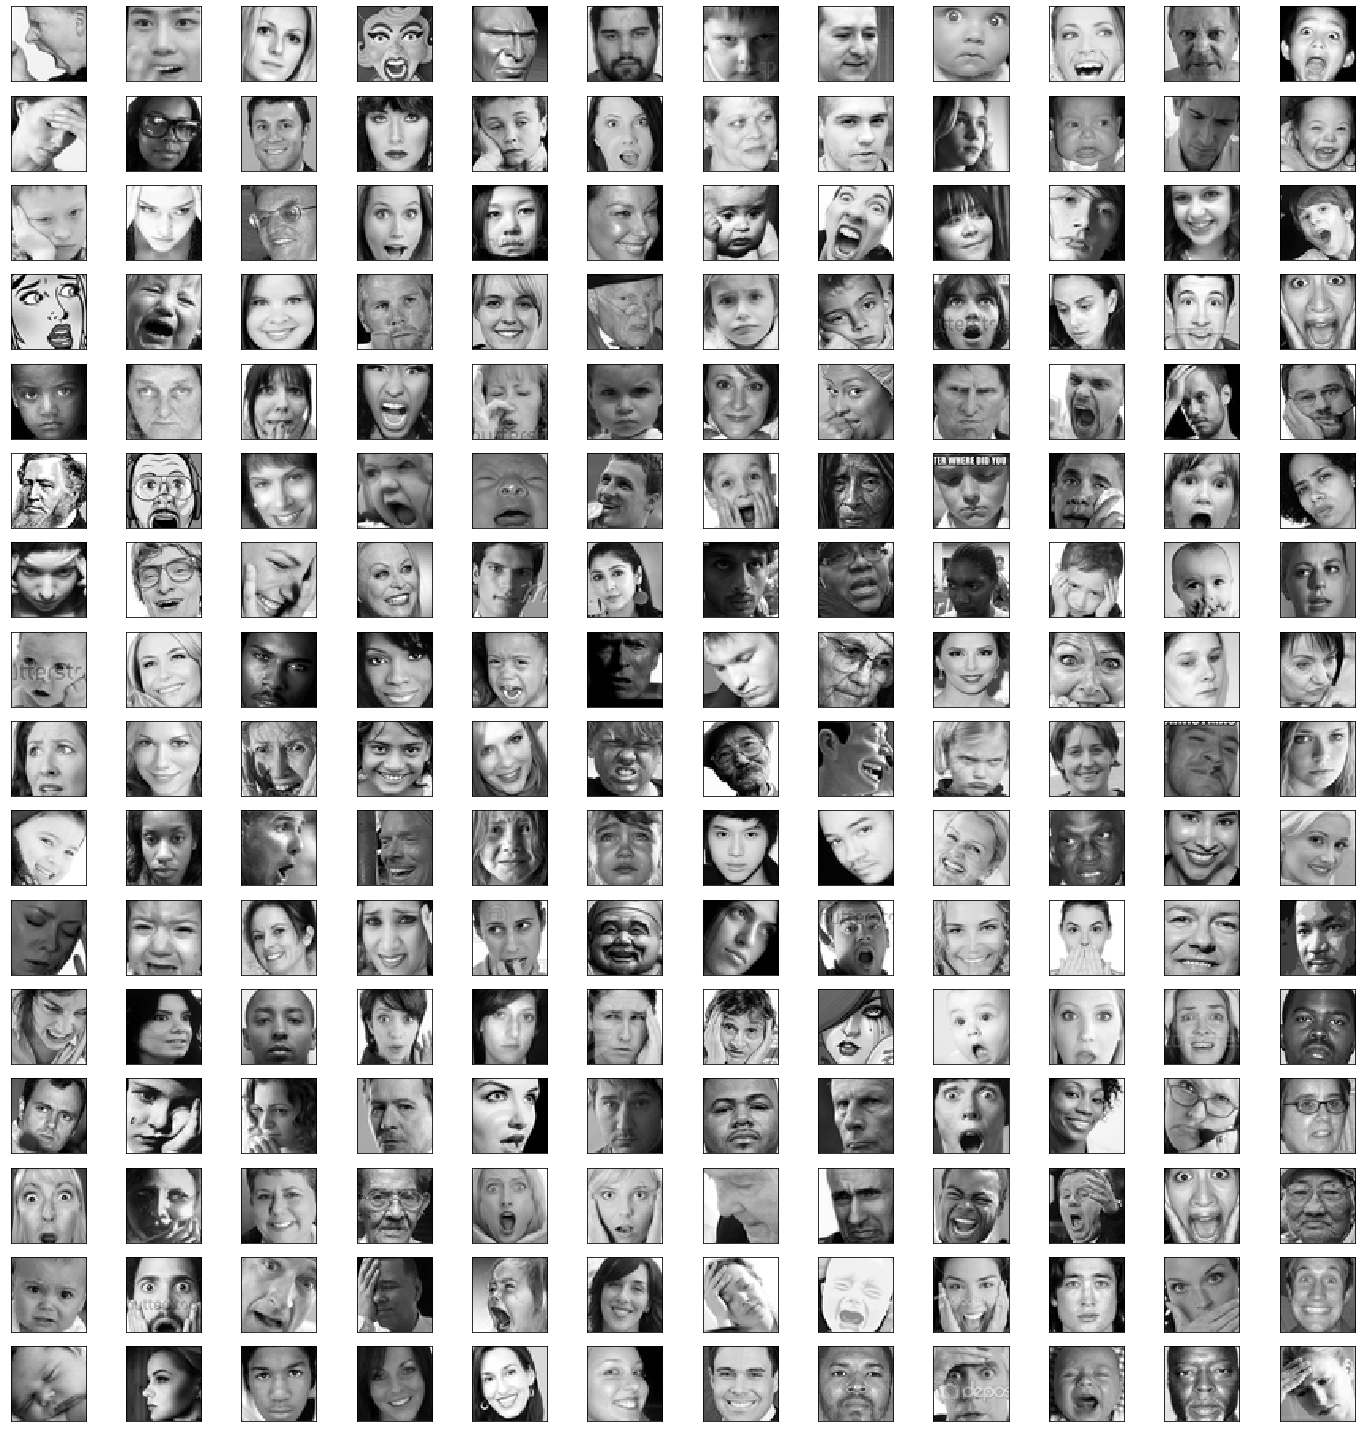

In [0]:
#print a selection of images in the dataset
def overview(start, end, X):
    """
    The function is used to plot first several pictures for overviewing inputs format
    """
    fig = plt.figure(figsize=(20,20))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,191, X)

In [0]:
y_train = y_train 
y_public = y_val 
y_private = y_test 
y_train_labels  = [np.argmax(lst) for lst in y_train]
y_public_labels = [np.argmax(lst) for lst in y_public]
y_private_labels = [np.argmax(lst) for lst in y_private]

In [0]:
   #function to plot the distribution of data in training and validation datasets
   def plot_distribution(y1, y2, data_names, ylims =[1000,1000]): 
    """
    The function is used to plot the distribution of the labels of provided dataset
   """
    colorset = brewer2mpl.get_map('Set1', 'qualitative', 3).mpl_colors
    fig = plt.figure(figsize=(4,4))
    ax1 = fig.add_subplot(1,2,1)
    ax1.bar(np.arange(1,4), np.bincount(y1), color=colorset, alpha=0.8)
    ax1.set_xticks(np.arange(1.25,4.25,1))
    ax1.set_xticklabels(labels, rotation=60, fontsize=14)
    ax1.set_xlim([0, 5])
    ax1.set_ylim([0, ylims[0]])
    ax1.set_title(data_names[0])
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.bar(np.arange(1,4), np.bincount(y2), color=colorset, alpha=0.8)
    ax2.set_xticks(np.arange(1.25,4.25,1))
    ax2.set_xticklabels(labels, rotation=60, fontsize=14)
    ax2.set_xlim([0, 5])
    ax2.set_ylim([0, ylims[1]])
    ax2.set_title(data_names[1])
    plt.tight_layout()
    plt.show()

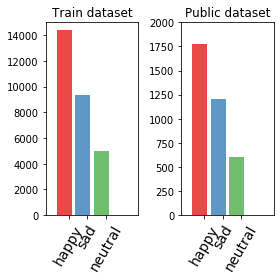

In [0]:
plot_distribution(y_train_labels, y_public_labels, \
                  ['Train dataset', 'Public dataset'], \
                  ylims =[15000,2000]) 

In [0]:
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.callbacks import ModelCheckpoint

In [0]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[checkpoint])

In [0]:
# Final Model Architecture:
from keras import layers
from keras import models
from keras import optimizers

modelN = models.Sequential()
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(48, 48, 1)))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(3, activation='softmax'))

# optimizer:
modelN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Training....')

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

#fit
nb_epoch = 9
batch_size = 128

modelF = modelN.fit(X_train, y_train, nb_epoch=nb_epoch, batch_size=batch_size,
          validation_data=(X_val, y_val), shuffle=True, verbose=1, callbacks=[checkpoint])







Training....
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 28709 samples, validate on 3589 samples
Epoch 1/9





28709/28709 [==============================] - 35s 1ms/step - loss: 1.0174 - acc: 0.5009 - val_loss: 0.9883 - val_acc: 0.5024

Epoch 00001: loss improved from inf to 1.01742, saving model to best_model.hdf5
Epoch 2/9
28709/28709 [==============================] - 20s 700us/step - loss: 0.9479 - acc: 0.5206 - val_loss: 0.9012 - val_acc: 0.5433

Epoch 00002: loss improved from 1.01742 to 0.94788, saving model to best_model.hdf5
Epoch 3/9
28709/28709 [==============================] - 20s 705us/step - loss: 0.8761 - acc: 0.5722 - val_loss: 0.8720 - val_acc: 0.5901

Epoch 00003: loss improved from 0.94788 to 0.87608, saving model to best_model.hdf5
Epoch 4/9
28709/28709 [==============================] - 20s 701us/step - loss: 0.8274 - acc: 0.6095 - val_loss: 0.8156 - val_acc: 0.6135

Epoch 00004: loss improved f

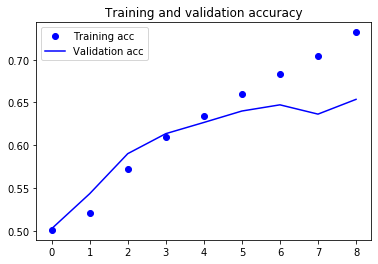

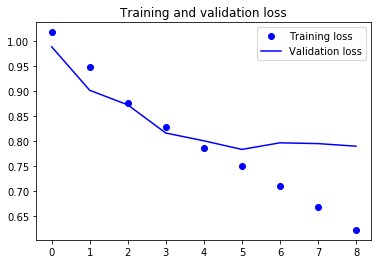

In [0]:
#save trained model for offline use
modelN.save('drive/My Drive/Colab Notebooks/EmotionNet/emotionNet_small_model')

#plot accuracy and loss against epochs
acc = modelF.history['acc']
val_acc = modelF.history['val_acc']
loss = modelF.history['loss']
val_loss = modelF.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [0]:
#load model only if notebook has been closed after training model
from numpy import loadtxt
from keras.models import load_model

modelN = load_model('drive/My Drive/Colab Notebooks/EmotionNet/emotionNet_small_model')













Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
# evaluate model on test dataset
X_fname = 'drive/My Drive/Colab Notebooks/EmotionNet/X_test_privatetest6_100pct.npy'
y_fname = 'drive/My Drive/Colab Notebooks/EmotionNet/y_test_privatetest6_100pct.npy'
X = np.load(X_fname)
y = np.load(y_fname)


In [0]:
#print model accuracy
score = modelN.evaluate(X, y, verbose=0)
print ("model %s: %.2f%%" % (modelN.metrics_names[1], score[1]*100))

model acc: 63.97%


In [0]:
# prediction and true labels
y_prob = modelN.predict(X, batch_size=32, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y]

In [0]:
def plot_subjects(start, end, y_pred, y_true, title=False):
    """
    The function is used to plot the picture subjects
    """
    fig = plt.figure(figsize=(12,12))
    emotion = {0:'Happy', 1:'Sad', 2:'Neutral'}
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(6,6,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        if y_pred[i] != y_true[i]:
            #plt.xlabel(emotion[y_true[i]], color='#53b3cb',fontsize=12)
            plt.xlabel(emotion[y_true[i]], color='red',fontsize=12)
        else:
            plt.xlabel(emotion[y_true[i]], fontsize=12)
        if title:
            plt.title(emotion[y_pred[i]], color='blue')
        plt.tight_layout()
    plt.show()

In [0]:
import brewer2mpl
def plot_probs(start,end, y_prob):
    """
    The function is used to plot the probability in histogram for six labels 
    """
    fig = plt.figure(figsize=(12,12))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(6,6,i+1)
        set3 = brewer2mpl.get_map('Set1', 'qualitative', 3).mpl_colors
        ax.bar(np.arange(0,3), y_prob[i], color=set3,alpha=0.5)
        ax.set_xticks(np.arange(0.5,3.5,1))
        labels = ['happy', 'sad','neutral']
        ax.set_xticklabels(labels, rotation=90, fontsize=10)
        ax.set_yticks(np.arange(0.0,1.1,0.5))
        plt.tight_layout()
    plt.show()

In [0]:
def plot_subjects_with_probs(start, end, y_prob):
    """
    This plotting function is used to plot the probability together with its picture
    """
    iter = int((end - start)/6)
    for i in np.arange(0,iter):
        plot_subjects(i*6,(i+1)*6-1, y_pred, y_true, title=False)
        plot_probs(i*6,(i+1)*6-1, y_prob)

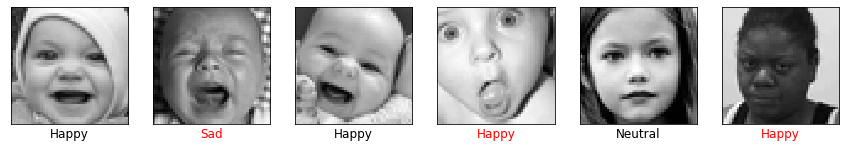

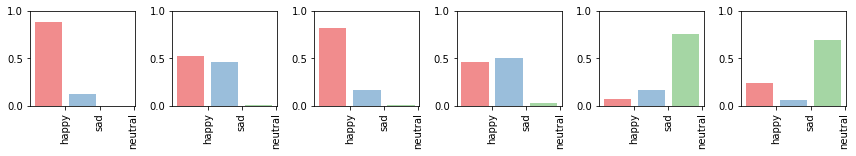

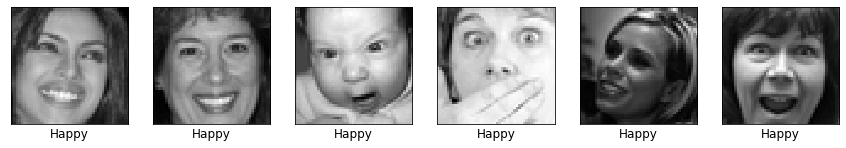

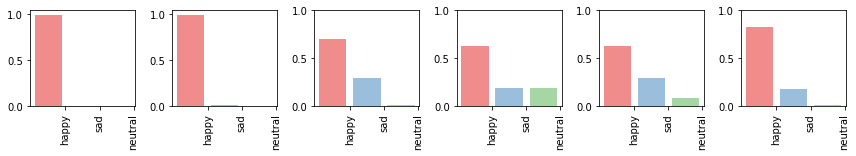

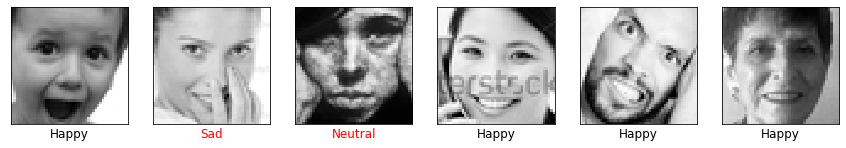

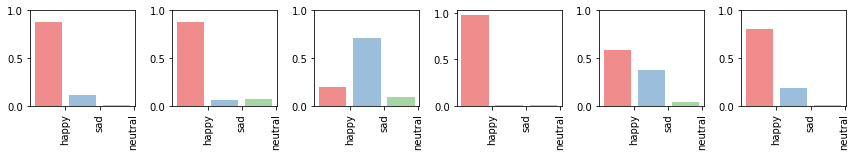

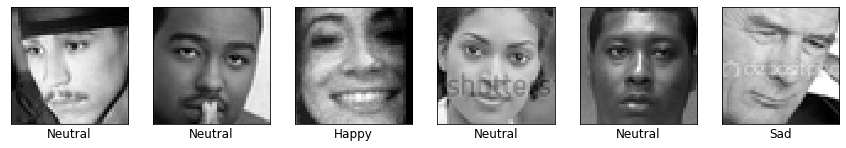

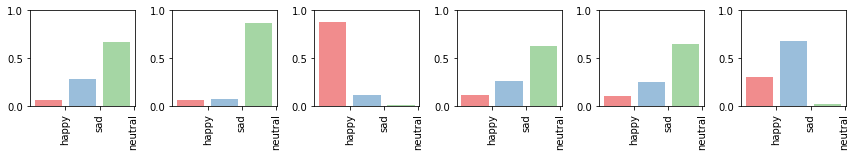

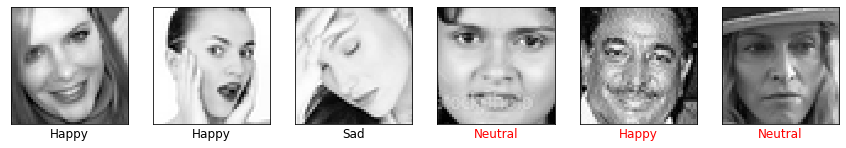

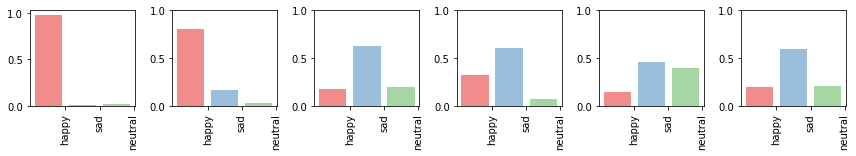

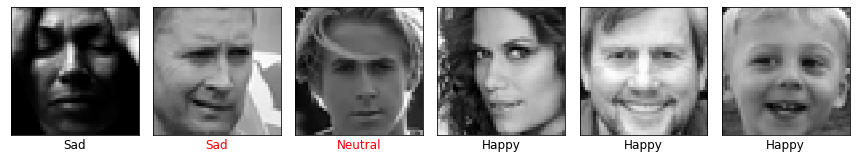

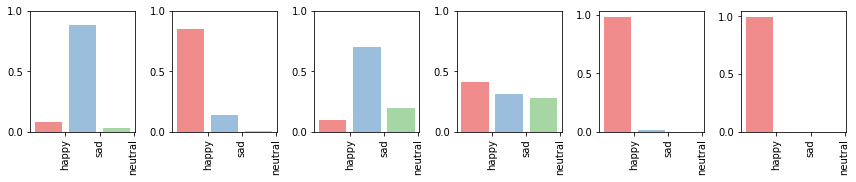

In [0]:
#plot a selection of the test dataset alongside classification
#incorrect classifications are shown in red
import matplotlib
plot_subjects_with_probs(0, 36, y_prob)

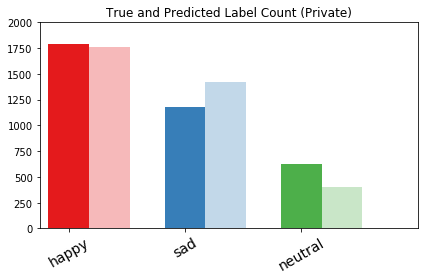

In [0]:
def plot_distribution2(y_true, y_pred):
    """
    The function is used to compare the number of true labels as well as prediction results
    """
    labels = ['happy', 'sad','neutral']
    colorset = brewer2mpl.get_map('Set1', 'qualitative', 3).mpl_colors
    ind = np.arange(1.5,4,1)  # the x locations for the groups
    width = 0.35   
    fig, ax = plt.subplots()
    true = ax.bar(ind, np.bincount(y_true), width, color=colorset, alpha=1.0)
    pred = ax.bar(ind + width, np.bincount(y_pred), width, color=colorset, alpha=0.3)
    ax.set_xticks(np.arange(1.5,4,1))
    ax.set_xticklabels(labels, rotation=30, fontsize=14)
    ax.set_xlim([1.25, 4.5])
    ax.set_ylim([0, 2000])
    ax.set_title('True and Predicted Label Count (Private)')
    plt.tight_layout()
    plt.show()
    
plot_distribution2(y_true, y_pred)